<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

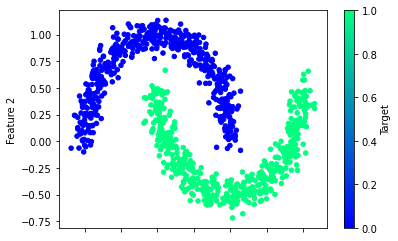

In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
import sklearn as skl
import tensorflow as tf
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [2]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons, random_state=78)

# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=5, activation="relu", input_dim=2))

# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 15        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [3]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [4]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 547us/step - loss: 0.6319 - accuracy: 0.5760
Epoch 2/100
24/24 [==============================] - 0s 445us/step - loss: 0.5998 - accuracy: 0.6000
Epoch 3/100
24/24 [==============================] - 0s 617us/step - loss: 0.5712 - accuracy: 0.6213
Epoch 4/100
24/24 [==============================] - 0s 614us/step - loss: 0.5453 - accuracy: 0.6400
Epoch 5/100
24/24 [==============================] - 0s 419us/step - loss: 0.5220 - accuracy: 0.6480
Epoch 6/100
24/24 [==============================] - 0s 424us/step - loss: 0.5017 - accuracy: 0.7040
Epoch 7/100
24/24 [==============================] - 0s 449us/step - loss: 0.4842 - accuracy: 0.7400
Epoch 8/100
24/24 [==============================] - 0s 414us/step - loss: 0.4678 - accuracy: 0.8027
Epoch 9/100
24/24 [==============================] - 0s 406us/step - loss: 0.4539 - accuracy: 0.8547
Epoch 10/100
24/24 [==============================] - 0s 409us/step - loss: 0.4410 - accura

In [5]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.2076 - accuracy: 0.9080
Loss: 0.20759984850883484, Accuracy: 0.9079999923706055


In [8]:
# Create a new neural network model with 6 neurons
nn_model2 = tf.keras.models.Sequential()

nn_model2.add(tf.keras.layers.Dense(units=6, activation="relu", input_dim=2))

nn_model2.add(tf.keras.layers.Dense(units=6, activation="relu", input_dim=6))

nn_model2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

nn_model2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

fit_model = nn_model2.fit(X_train_scaled, y_train, epochs=100)


Epoch 1/100
24/24 [==============================] - 0s 523us/step - loss: 0.7299 - accuracy: 0.2480
Epoch 2/100
24/24 [==============================] - 0s 508us/step - loss: 0.6981 - accuracy: 0.4747
Epoch 3/100
24/24 [==============================] - 0s 556us/step - loss: 0.6696 - accuracy: 0.5907
Epoch 4/100
24/24 [==============================] - 0s 485us/step - loss: 0.6430 - accuracy: 0.6213
Epoch 5/100
24/24 [==============================] - 0s 464us/step - loss: 0.6159 - accuracy: 0.6787
Epoch 6/100
24/24 [==============================] - 0s 590us/step - loss: 0.5849 - accuracy: 0.7307
Epoch 7/100
24/24 [==============================] - 0s 615us/step - loss: 0.5495 - accuracy: 0.8120
Epoch 8/100
24/24 [==============================] - 0s 469us/step - loss: 0.5138 - accuracy: 0.8627
Epoch 9/100
24/24 [==============================] - 0s 462us/step - loss: 0.4777 - accuracy: 0.8640
Epoch 10/100
24/24 [==============================] - 0s 478us/step - loss: 0.4439 - accura

In [9]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0510 - accuracy: 1.0000
Loss: 0.051007043570280075, Accuracy: 1.0
